In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("house_price.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [8]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [10]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [12]:
df['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

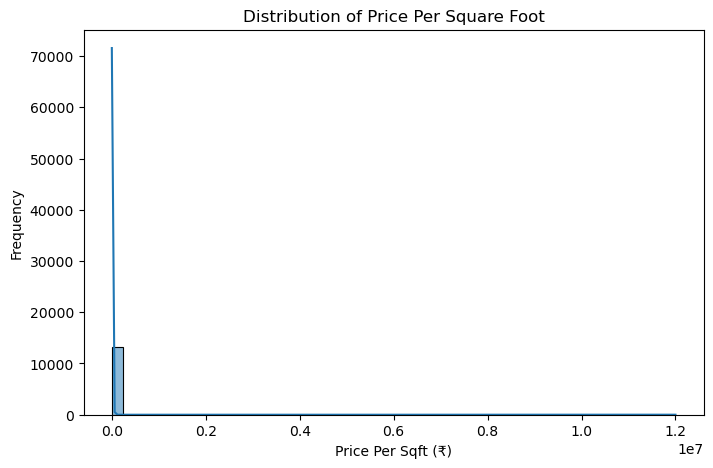

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['price_per_sqft'], bins=50, kde=True)
plt.xlabel("Price Per Sqft (₹)")
plt.ylabel("Frequency")
plt.title("Distribution of Price Per Square Foot")
plt.show()

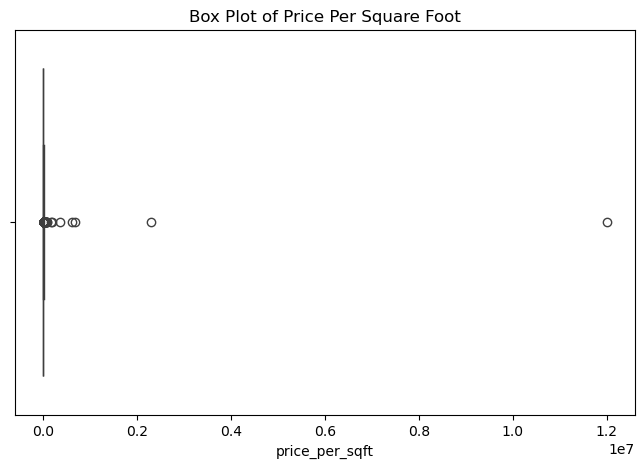

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['price_per_sqft'])
plt.title("Box Plot of Price Per Square Foot")
plt.show()

### Remove outliers: Mean and SD method

In [19]:
mean = df['price_per_sqft'].mean()
std_dev = df['price_per_sqft'].std()
lower_limit = mean - (3 * std_dev)
upper_limit = mean + (3 * std_dev)
outliers = df[(df['price_per_sqft'] < lower_limit) | (df['price_per_sqft'] > upper_limit)]
print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 5


In [21]:
df_trimmed = df[(df['price_per_sqft'] >= lower_limit) & (df['price_per_sqft'] <= upper_limit)]

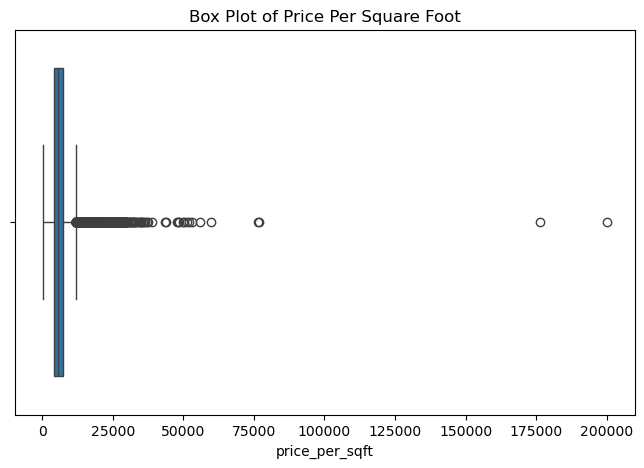

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_trimmed['price_per_sqft'])
plt.title("Box Plot of Price Per Square Foot")
plt.show()

### Percentile method

In [70]:
lower_limit = np.percentile(df['price_per_sqft'], 5)
upper_limit = np.percentile(df['price_per_sqft'], 95)

In [72]:
outliers = df[(df['price_per_sqft'] < lower_limit) | (df['price_per_sqft'] > upper_limit)]
print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 1320


In [74]:
df_capped = df.copy()
df_capped['price_per_sqft'] = np.where(df_capped['price_per_sqft'] > upper_limit, upper_limit,
                                       np.where(df_capped['price_per_sqft'] < lower_limit, lower_limit, df_capped['price_per_sqft']))

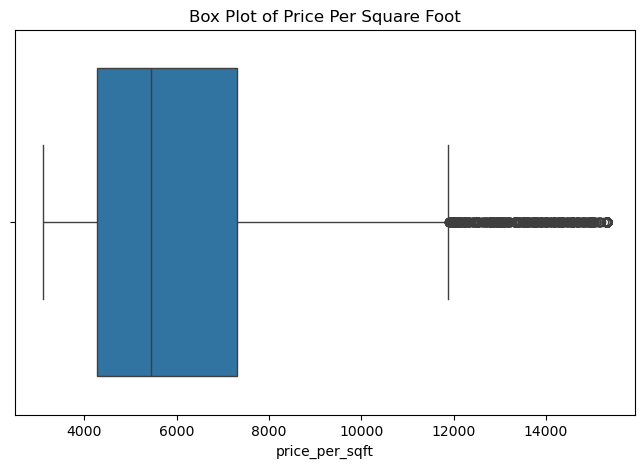

In [76]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_capped['price_per_sqft'])
plt.title("Box Plot of Price Per Square Foot")
plt.show()

### Interquartile Range (IQR) Method

In [35]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

In [37]:
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

In [39]:
outliers = df[(df['price_per_sqft'] < lower_limit) | (df['price_per_sqft'] > upper_limit)]
print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 1265


In [41]:
df_iqr = df[(df['price_per_sqft'] >= lower_limit) & (df['price_per_sqft'] <= upper_limit)]

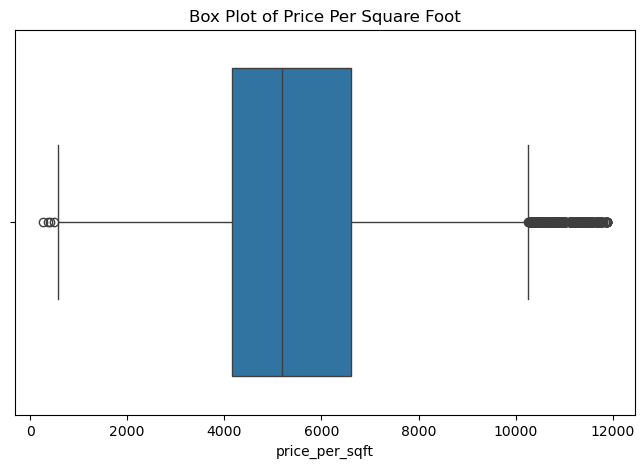

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_iqr['price_per_sqft'])
plt.title("Box Plot of Price Per Square Foot")
plt.show()

### Z-Score method

In [46]:
from scipy.stats import zscore
df['z_score'] = zscore(df['price_per_sqft'])

In [48]:
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]
print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 5


In [50]:
df_zscore = df[(df['z_score'] >= -3) & (df['z_score'] <= 3)]

In [52]:
df_zscore = df_zscore.drop(columns=['z_score'])

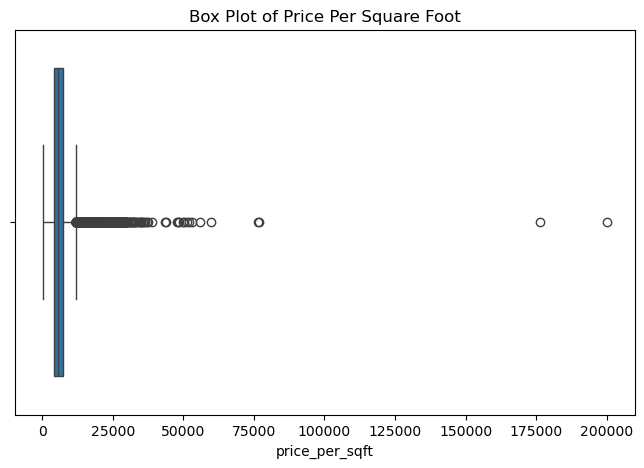

In [54]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_zscore['price_per_sqft'])
plt.title("Box Plot of Price Per Square Foot")
plt.show()

###  Create a box plot and use this to determine which method seems to work best to remove outliers for this data?

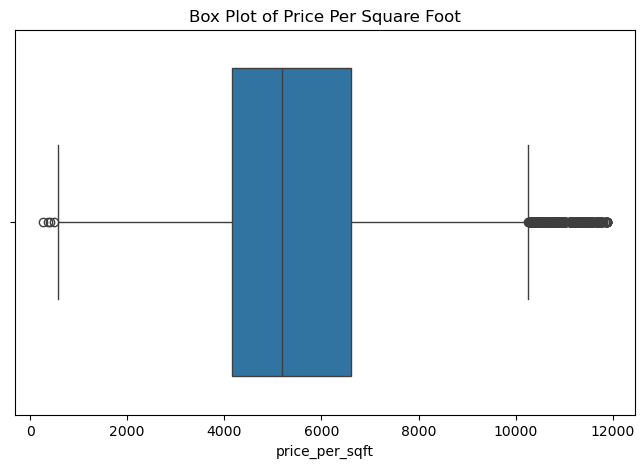

In [57]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_iqr['price_per_sqft'])
plt.title("Box Plot of Price Per Square Foot")
plt.show()

##### The IQR method is found to be the ideal one to use in this scenario. This is the best option for handling skewed data

### Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation.

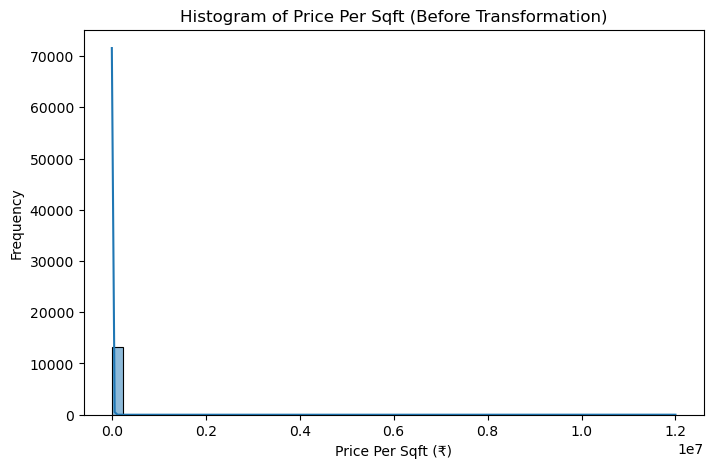

In [62]:
plt.figure(figsize=(8,5))
sns.histplot(df['price_per_sqft'], bins=50, kde=True)
plt.xlabel("Price Per Sqft (₹)")
plt.ylabel("Frequency")
plt.title("Histogram of Price Per Sqft (Before Transformation)")
plt.show()

In [107]:
from scipy.stats import skew, kurtosis, boxcox
skew_before = skew(df['price_per_sqft'])
kurt_before = kurtosis(df['price_per_sqft'])
print(f"Skewness before transformation: {skew_before:.2f}")
print(f"Kurtosis before transformation: {kurt_before:.2f}")

Skewness before transformation: 108.27
Kurtosis before transformation: 12090.63


### Check the correlation between all the numerical columns and plot heatmap.



In [78]:
numerical_cols = df.select_dtypes(include=['number'])

In [80]:
correlation_matrix = numerical_cols.corr()

In [82]:
print(correlation_matrix)

                total_sqft      bath     price       bhk  price_per_sqft  \
total_sqft        1.000000  0.392743  0.574330  0.346013       -0.008267   
bath              0.392743  1.000000  0.455998  0.897951        0.030883   
price             0.574330  0.455998  1.000000  0.396883        0.028387   
bhk               0.346013  0.897951  0.396883  1.000000        0.030955   
price_per_sqft   -0.008267  0.030883  0.028387  0.030955        1.000000   
z_score          -0.008267  0.030883  0.028387  0.030955        1.000000   

                 z_score  
total_sqft     -0.008267  
bath            0.030883  
price           0.028387  
bhk             0.030955  
price_per_sqft  1.000000  
z_score         1.000000  


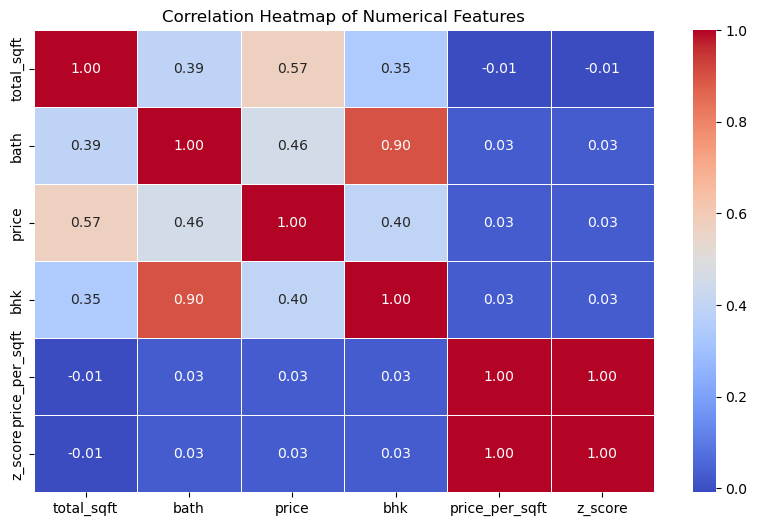

In [87]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### Draw Scatter plot between the variables to check the correlation between them.

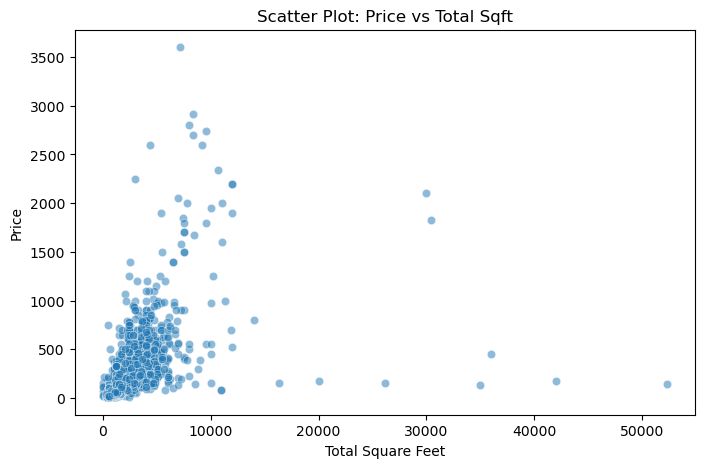

In [96]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['total_sqft'], y=df['price'], alpha=0.5)
plt.xlabel("Total Square Feet")
plt.ylabel("Price")
plt.title("Scatter Plot: Price vs Total Sqft")
plt.show()

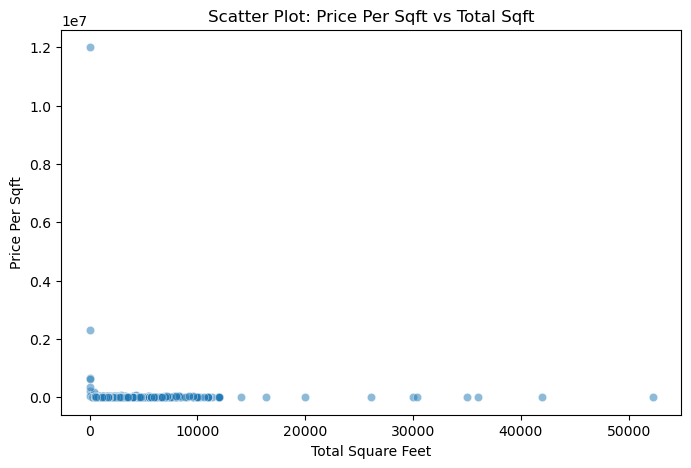

In [98]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['total_sqft'], y=df['price_per_sqft'], alpha=0.5)
plt.xlabel("Total Square Feet")
plt.ylabel("Price Per Sqft")
plt.title("Scatter Plot: Price Per Sqft vs Total Sqft")
plt.show()

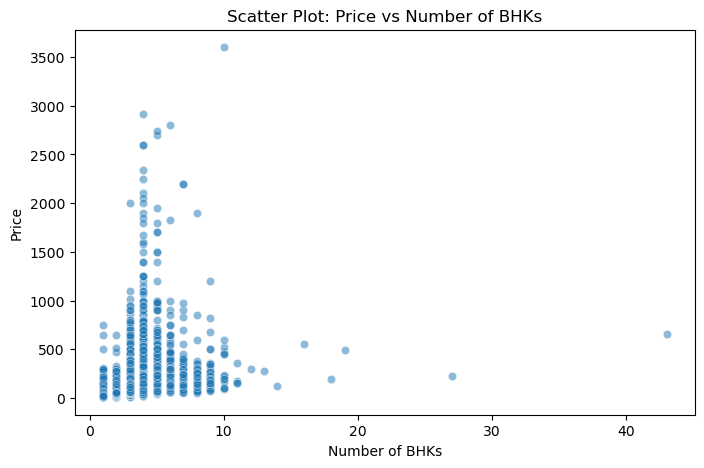

In [102]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['bhk'], y=df['price'], alpha=0.5)
plt.xlabel("Number of BHKs")
plt.ylabel("Price")
plt.title("Scatter Plot: Price vs Number of BHKs")
plt.show()